#Ejemplo: Árbol de Clasificación - Play Tennis

##Limpieza de Datos

In [0]:
import pandas as pd

In [39]:
df = pd.read_csv("play_tennis.csv")
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [40]:
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [0]:
del df['day']

In [42]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


##Label Encoding

In [0]:
from sklearn import preprocessing

In [0]:
le = preprocessing.LabelEncoder() 
le = le.fit(df['outlook'])
df['outlook'] = le.transform(df['outlook'])

In [45]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Overcast': 0, 'Rain': 1, 'Sunny': 2}


In [46]:
df.head()

,outlook,temp,humidity,wind,play
0,2,Hot,High,Weak,No
1,2,Hot,High,Strong,No
2,0,Hot,High,Weak,Yes
3,1,Mild,High,Weak,Yes
4,1,Cool,Normal,Weak,Yes


In [0]:
lTemp = preprocessing.LabelEncoder() 
lTemp = lTemp.fit(df['temp'])
df['temp'] = lTemp.transform(df['temp'])

In [48]:
le_Temp = dict(zip(lTemp.classes_, lTemp.transform(lTemp.classes_)))
print(le_Temp)

{'Cool': 0, 'Hot': 1, 'Mild': 2}


In [0]:
lHum = preprocessing.LabelEncoder() 
lHum = lHum.fit(df['humidity'])
df['humidity'] = lHum.transform(df['humidity'])

In [0]:
lwin = preprocessing.LabelEncoder() 
lwin = lwin.fit(df['wind'])
df['wind'] = lwin.transform(df['wind'])

In [51]:
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [0]:
lplay = preprocessing.LabelEncoder() 
lplay = lplay.fit(df['play'])
df['play'] = lplay.transform(df['play'])

In [53]:
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


#Árbol de Clasificación

##Separación de atributos y objetivos

In [0]:
x = df.drop('play', axis=1)
y = df['play']

##Separación Data Entrenamiento y Data de Validación 

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3)
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (9, 4)
Validation shape:  (5, 4)


##Entrenamiento del árbol

In [0]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier()
m2 = m2.fit(x_train,y_train)

In [57]:
m2.score(x_val,y_val)

0.6

##Visualizando el Árbol

In [0]:
from sklearn.tree import export_graphviz
import graphviz

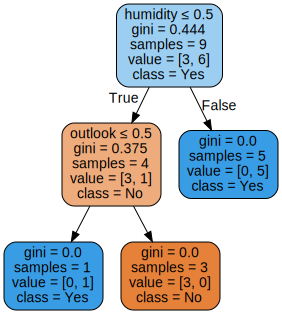

In [60]:
dot_data = export_graphviz(m2,feature_names= x.columns, class_names= ['No','Yes'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#graph.render("arbol",format='png')